In [12]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import torch

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

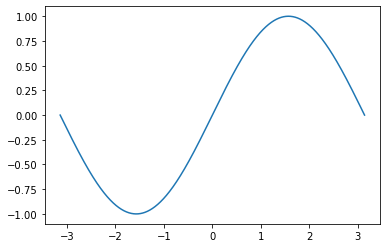

In [2]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

plt.figure()
plt.plot(x, y)

xx = x.unsqueeze(-1).pow(torch.tensor([1, 2, 3]))

tensor([ 5.4170,  5.3983,  5.3795,  ..., -9.3736, -9.4018, -9.4301],
       grad_fn=<ViewBackward>)


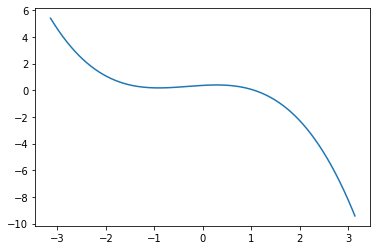

99 251.15496826171875
199 112.50261688232422
299 50.59392166137695
399 24.90796661376953
499 14.836400985717773
tensor([ 0.1030,  0.0978,  0.0927,  ..., -0.1102, -0.1155, -0.1208],
       grad_fn=<ViewBackward>)


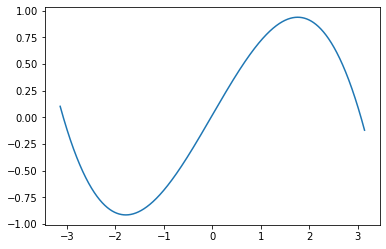

599 11.032596588134766
699 9.62723159790039
799 9.11349105834961
899 8.926172256469727
999 8.857649803161621
tensor([ 0.1949,  0.1890,  0.1831,  ..., -0.1825, -0.1884, -0.1943],
       grad_fn=<ViewBackward>)


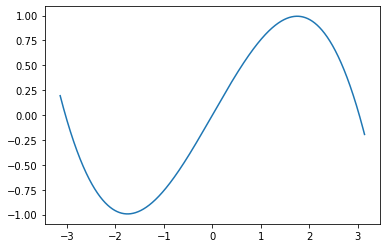

1099 8.83238410949707
1199 8.822970390319824
1299 8.819425582885742
1399 8.818061828613281
1499 8.81752872467041
tensor([ 0.2018,  0.1958,  0.1898,  ..., -0.1895, -0.1955, -0.2015],
       grad_fn=<ViewBackward>)


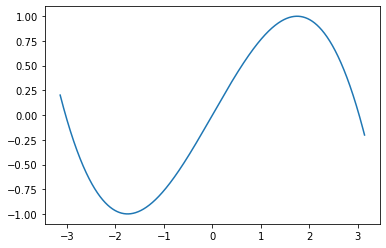

1599 8.817325592041016
1699 8.817224502563477
1799 8.817192077636719
1899 8.817188262939453
1999 8.817174911499023


In [11]:
model = torch.nn.Sequential(
    torch.nn.Linear(3, 10),
    torch.nn.Linear(10, 1),
    torch.nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')
lr = 1e-6

for t in range(2000):
    y_pred = model(xx)
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    if t % 500 == 0:
        print(y_pred)
        plt.plot(x, y_pred.detach().numpy())
        plt.show()
        
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad

In [4]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1326,  0.2215,  0.0344],
                      [-0.4393,  0.4075, -0.5124],
                      [ 0.6224,  0.4639, -0.3690],
                      [ 0.5006, -0.3407, -0.0543],
                      [ 0.5537, -0.0600, -0.2633],
                      [-0.0185, -0.1792,  0.5685],
                      [-0.4930, -0.2687,  0.5310],
                      [-0.0105, -0.4148,  0.5029],
                      [-0.0892, -0.3739,  0.0200],
                      [-0.4727,  0.3756, -0.4990]])),
             ('0.bias',
              tensor([ 0.0386, -0.0722, -0.2557, -0.0145,  0.3444,  0.1485, -0.2556, -0.2696,
                       0.2650, -0.0993])),
             ('1.weight',
              tensor([[-0.2151, -0.1768,  0.5824,  0.2269,  0.2235,  0.2885, -0.2904,  0.1649,
                        0.0141, -0.0334]])),
             ('1.bias', tensor([-0.0087]))])

In [5]:
linear_layer = model[1]

In [6]:
linear_layer.weight[:, 0]

tensor([-0.2151], grad_fn=<SelectBackward>)

In [7]:
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

Result: y = -0.008729744702577591 + -0.21509017050266266 x + -0.17675946652889252 x^2 + 0.5824421048164368 x^3


In [8]:
y_result = linear_layer.bias.item() + \
           linear_layer.weight[:, 0].item()*x + \
           linear_layer.weight[:, 1].item()*x**2 + \
           linear_layer.weight[:, 2].item()*x**3

In [9]:
y_result

tensor([-19.1369, -19.0800, -19.0231,  ...,  15.5305,  15.5804,  15.6304])

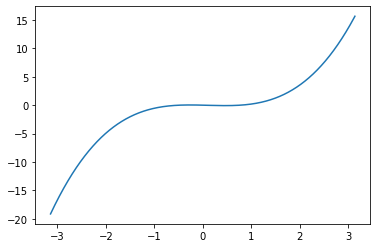

In [10]:
plt.plot(x, y_result)